In [2]:
import pandas as pd
import numpy as np

In [3]:
#data visualisation
import seaborn as sns     
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import datetime as dt
import warnings; warnings.simplefilter('ignore')  

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
data=pd.read_csv("/content/drive/MyDrive/ProjectsDatasets/nyc/train.csv")

In [9]:
data.shape

(1458644, 11)

In [10]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [11]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [12]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [13]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [14]:
data.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

In [15]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [16]:
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'])

In [17]:
data['pickup_day']=data['pickup_datetime'].dt.day_name()
data['dropoff_day']=data['dropoff_datetime'].dt.day_name()
data['pickup_day_no']=data['pickup_datetime'].dt.weekday
data['dropoff_day_no']=data['dropoff_datetime'].dt.weekday
data['pickup_hour']=data['pickup_datetime'].dt.hour
data['dropoff_hour']=data['dropoff_datetime'].dt.hour
data['pickup_month']=data['pickup_datetime'].dt.month
data['dropoff_month']=data['dropoff_datetime'].dt.month

In [18]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [19]:
data['pickup_timeofday']=data['pickup_hour'].apply(time_of_day)
data['dropoff_timeofday']=data['dropoff_hour'].apply(time_of_day)

In [20]:
from geopy.distance import great_circle

In [21]:
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return great_circle(start_coordinates,stop_coordinates).km

In [ ]:
data['distance'] = data.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

IQR Correction

In [23]:
q1 = data['trip_duration'].quantile(0.25)
q3 = data['trip_duration'].quantile(0.75)
iqr=q3-q1
minimum = q1-(1.5*iqr)
minimum
maximum = q3+(1.5*iqr)
maximum
data=data[(data['trip_duration']<maximum) & (data['trip_duration']>minimum)]

In [24]:
data.shape

(1384320, 22)

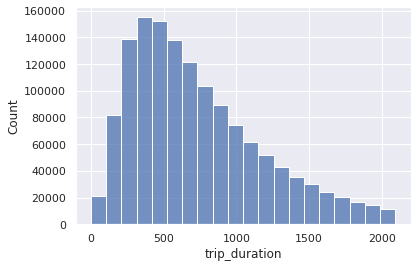

In [25]:
sns.histplot(data['trip_duration'],kde=False,bins=20)

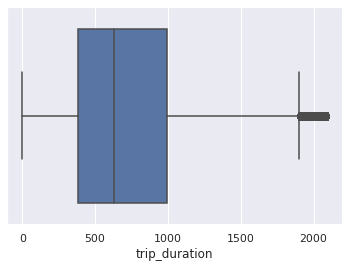

In [26]:
sns.boxplot(data['trip_duration'])

In [27]:
data['trip_duration'].sort_values(ascending=False)

1331883    2091
586537     2091
350409     2091
1305946    2091
235534     2091
           ... 
404610        1
269418        1
1056854       1
35196         1
918415        1
Name: trip_duration, Length: 1384320, dtype: int64

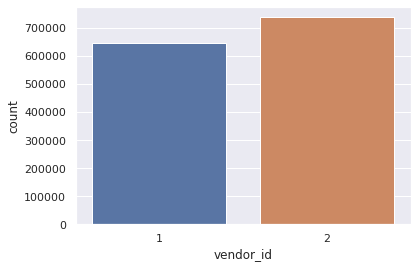

In [28]:
sns.countplot(x='vendor_id',data=data)

In [29]:
data.passenger_count.value_counts()

1    983813
2    197618
5     73857
3     56556
6     45799
4     26616
0        56
7         3
9         1
8         1
Name: passenger_count, dtype: int64

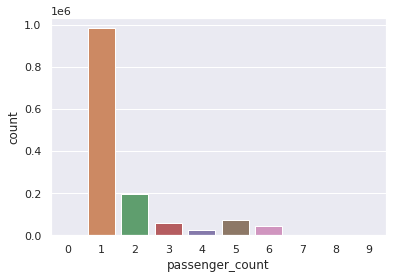

In [30]:
sns.countplot(x='passenger_count',data=data)

In [31]:
data=data[data['passenger_count']!=0]
data=data[data['passenger_count']<=6]

In [32]:
data['store_and_fwd_flag'].value_counts(normalize=True)

N    0.994901
Y    0.005099
Name: store_and_fwd_flag, dtype: float64

In [33]:
data['distance'].value_counts()

0.000000    5771
0.000424      45
0.000424      43
0.000424      35
0.000424      22
            ... 
2.086465       1
3.750318       1
2.636133       1
1.227886       1
1.134044       1
Name: distance, Length: 1378108, dtype: int64

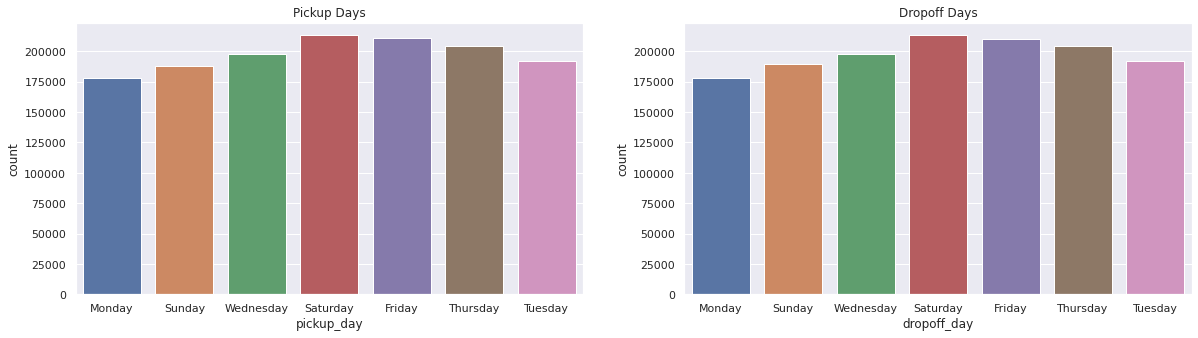

In [34]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=data,ax=ax1)
ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=data,ax=ax2)

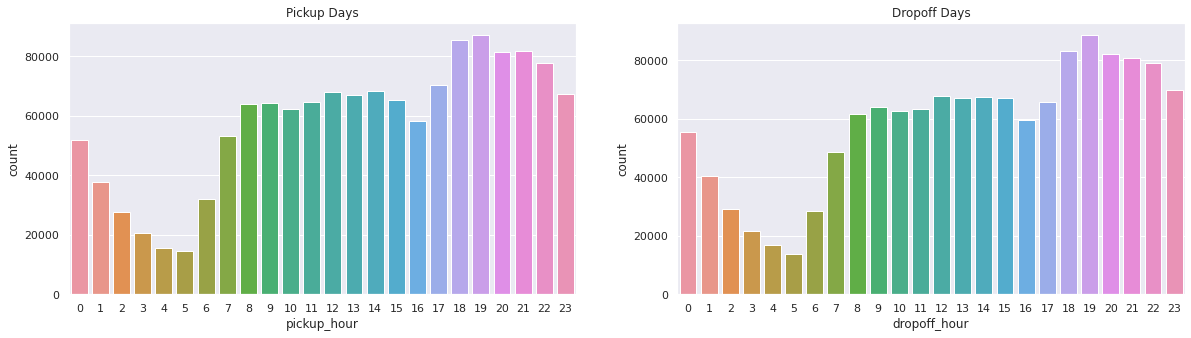

In [35]:
figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))
ax9.set_title('Pickup Days')
ax=sns.countplot(x="pickup_hour",data=data,ax=ax9)
ax10.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_hour",data=data,ax=ax10)

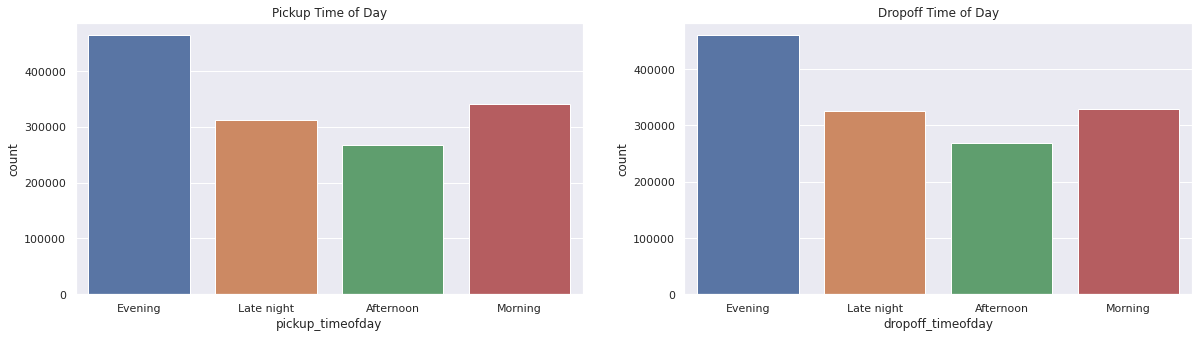

In [36]:
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))
ax3.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_timeofday",data=data,ax=ax3)
ax4.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_timeofday",data=data,ax=ax4)

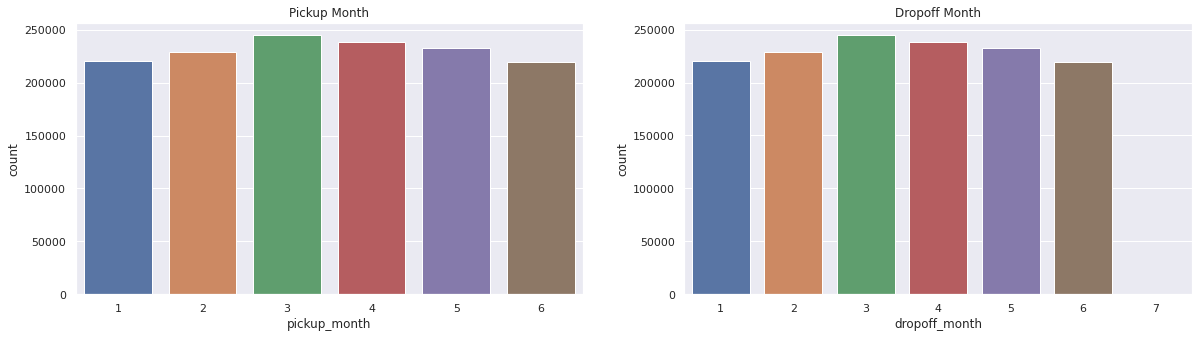

In [37]:
figure,(ax11,ax12)=plt.subplots(ncols=2,figsize=(20,5))
ax11.set_title('Pickup Month')
ax=sns.countplot(x="pickup_month",data=data,ax=ax11)
ax12.set_title('Dropoff Month')
ax=sns.countplot(x="dropoff_month",data=data,ax=ax12)

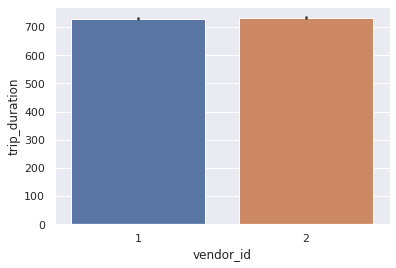

In [38]:
sns.barplot(y='trip_duration',x='vendor_id',data=data,estimator=np.mean)

In [39]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,Monday,0,0,17,17,3,3,Evening,Evening,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,Sunday,6,6,0,0,6,6,Late night,Late night,1.805510
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,Wednesday,2,2,19,19,4,4,Evening,Evening,1.485501
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,Saturday,5,5,13,13,3,3,Afternoon,Afternoon,1.188590
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,...,Saturday,5,5,22,22,1,1,Late night,Late night,1.098944


<Figure size 720x720 with 0 Axes>

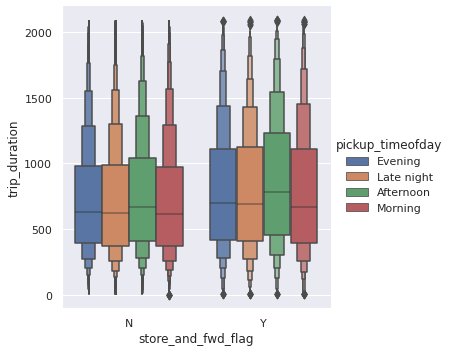

In [40]:
plt.figure(figsize=(10, 10))
sns.catplot(y='trip_duration',x='store_and_fwd_flag',data=data, kind="boxen", hue='pickup_timeofday')

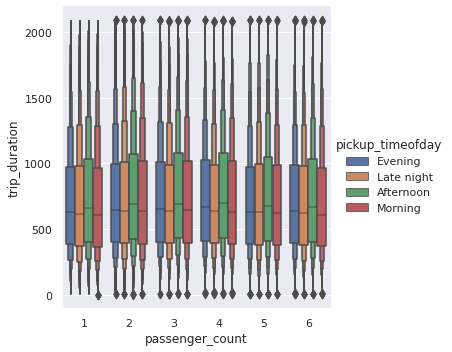

In [41]:
sns.catplot(y='trip_duration',x='passenger_count',data=data, kind="boxen", hue="pickup_timeofday")

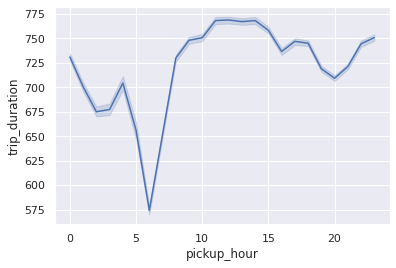

In [42]:
sns.lineplot(x='pickup_hour',y='trip_duration',data=data)

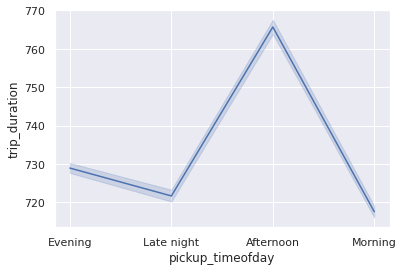

In [43]:
sns.lineplot(x='pickup_timeofday',y='trip_duration',data=data)

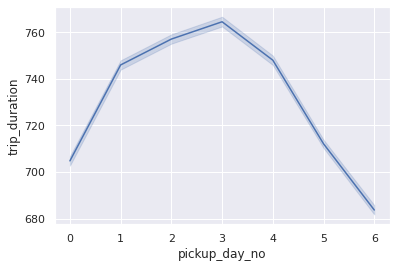

In [44]:
sns.lineplot(x='pickup_day_no',y='trip_duration',data=data)

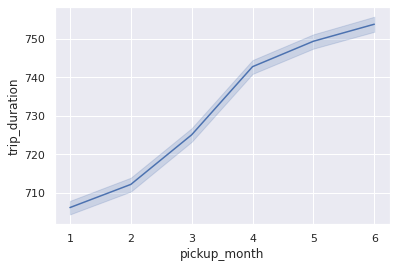

In [45]:
sns.lineplot(x='pickup_month',y='trip_duration',data=data)

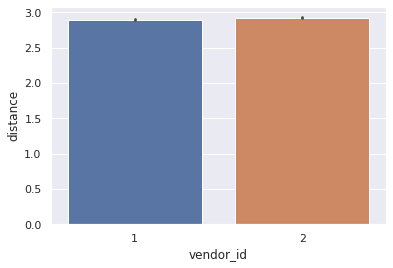

In [46]:
sns.barplot(y='distance',x='vendor_id',data=data,estimator=np.mean)

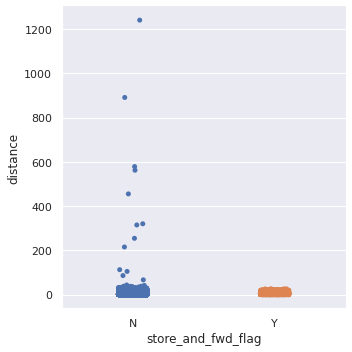

In [47]:
sns.catplot(y='distance',x='store_and_fwd_flag',data=data,kind="strip")

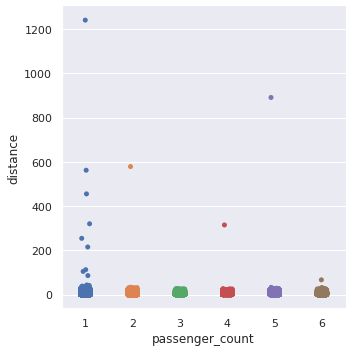

In [48]:
sns.catplot(y='distance',x='passenger_count',data=data,kind="strip")

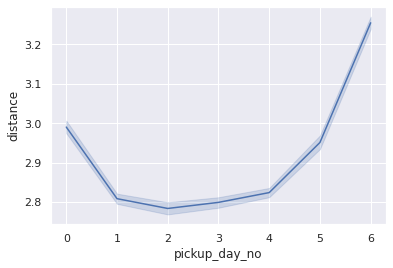

In [49]:
sns.lineplot(x='pickup_day_no',y='distance',data=data)

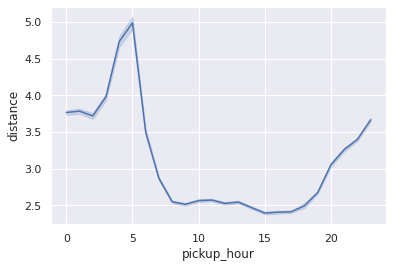

In [50]:
sns.lineplot(x='pickup_hour',y='distance',data=data)

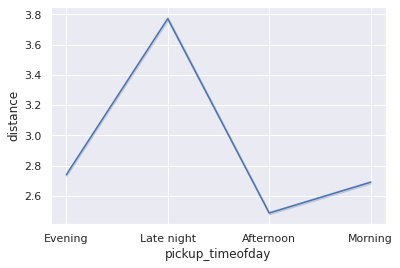

In [51]:
sns.lineplot(x='pickup_timeofday',y='distance',data=data)

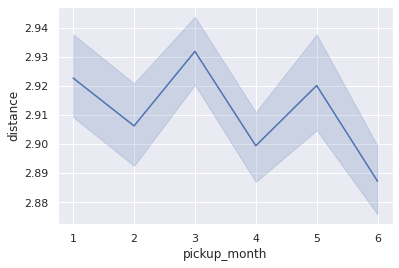

In [52]:
sns.lineplot(x='pickup_month',y='distance',data=data)

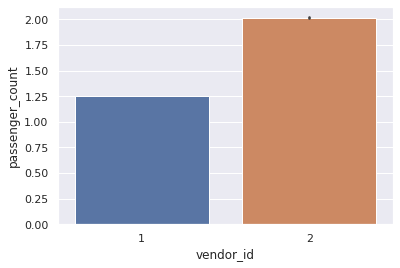

In [53]:
sns.barplot(y='passenger_count',x='vendor_id',data=data)

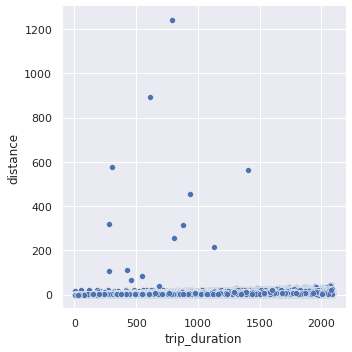

In [54]:
sns.relplot(y=data.distance,x='trip_duration',data=data)